In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)
pd.set_option('display.max_rows',999)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix

In [2]:
df = pd.read_csv("titanicclean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Sex           891 non-null object
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
FamilySize    891 non-null int64
Embarked      889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [4]:
df.shape

(891, 9)

In [5]:
df.head()

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,male,3,22.0,7.2500,1,0,2,S
1,1,female,1,38.0,71.2833,1,0,2,C
2,1,female,3,26.0,7.9250,0,0,1,S
3,1,female,1,35.0,53.1000,1,0,2,S
4,0,male,3,35.0,8.0500,0,0,1,S


In [6]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df2 = pd.get_dummies(data=df, drop_first=True)
df2

,Survived,Pclass,Age,Fare,SibSp,Parch,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.00,7.2500,1,0,2,1,0,1
1,1,1,38.00,71.2833,1,0,2,0,0,0
2,1,3,26.00,7.9250,0,0,1,0,0,1
3,1,1,35.00,53.1000,1,0,2,0,0,1
4,0,3,35.00,8.0500,0,0,1,1,0,1
5,0,3,28.00,8.4583,0,0,1,1,1,0
6,0,1,54.00,51.8625,0,0,1,1,0,1
7,0,3,2.00,21.0750,3,1,5,1,0,1
8,1,3,27.00,11.1333,0,2,3,0,0,1
9,1,2,14.00,30.0708,1,0,2,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
FamilySize    891 non-null int64
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [9]:
#Save into csv
#df2.to_csv("titanictransform.csv",index=False)

In [10]:
df3 = pd.read_csv("titanictransform.csv")

In [11]:
df3.head()

,Survived,Pclass,Age,Fare,SibSp,Parch,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,2,1,0,1
1,1,1,38.0,71.2833,1,0,2,0,0,0
2,1,3,26.0,7.9250,0,0,1,0,0,1
3,1,1,35.0,53.1000,1,0,2,0,0,1
4,0,3,35.0,8.0500,0,0,1,1,0,1


### Question 3: Predicting survival by sex 

In [12]:
df3 = df3[['Sex_male','Survived']]

In [13]:
df3.head()

,Sex_male,Survived
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [14]:
X = df3.iloc[:,0:1]
y = df3.iloc[:,1]

In [15]:
X.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(712, 1)

In [19]:
X_test.shape

(179, 1)

In [20]:
model1 = XGBClassifier()

In [21]:
model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
ypred1 = model1.predict(X_test)

In [23]:
ypred1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [24]:
y_test

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
137    0
696    0
485    0
244    0
344    0
853    1
621    1
653    1
886    0
110    0
294    0
447    1
192    1
682    0
538    0
819    0
30     0
673    1
63     0
396    0
877    0
141    1
793    0
235    0
204    1
620    0
23     1
198    1
842    1
739    0
120    0
477    0
837    0
790    0
362    0
86     0
67     0
350    0
210    0
659    0
448    1
820    1
360    0
802    1
280    0
585    1
70     0
299    1
211    1
44     1
408    0
446    1
426    1
168    0
196    0
772    0
72     0
422    0
532    0
591    1
312    0
311    1
889    1
835    1
833    0
605    0
767    0
539    1
357    0
254    0
266    0
66     1
319    1
778    0
174    0
493    0
215    1
309    1
822    0
250    0
165    1
541    0
625    0
388    0
76     0
281    0
712    1
338    1
327    1
321    0
545    0
590    0
291    1
465    0
814    0
442    0
670    1
462    0
286    1
209    1
669    1
2

In [25]:
type(ypred1)

numpy.ndarray

In [26]:
type(y_test)

pandas.core.series.Series

In [27]:
ypred1_df = pd.DataFrame(data=ypred1, columns=['Predictions'])

In [28]:
ypred1_df

,Predictions
0,0
1,0
2,0
3,1
4,1
5,1
6,1
7,0
8,1
9,1


In [29]:
y_test_df = pd.DataFrame(data=y_test)

In [30]:
y_test_df

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [31]:
X_test

,Sex_male
709,1
439,1
840,1
720,0
39,0
290,0
300,0
333,1
208,0
136,0


In [32]:
temp = pd.concat([X_test, y_test_df],axis=1)

In [33]:
temp.reset_index(inplace=True)

In [34]:
temp

,index,Sex_male,Survived
0,709,1,1
1,439,1,0
2,840,1,0
3,720,0,1
4,39,0,1
5,290,0,1
6,300,0,1
7,333,1,0
8,208,0,1
9,136,0,1


In [35]:
result1 = pd.concat([temp,ypred1_df],axis=1)

In [36]:
result1

,index,Sex_male,Survived,Predictions
0,709,1,1,0
1,439,1,0,0
2,840,1,0,0
3,720,0,1,1
4,39,0,1,1
5,290,0,1,1
6,300,0,1,1
7,333,1,0,0
8,208,0,1,1
9,136,0,1,1


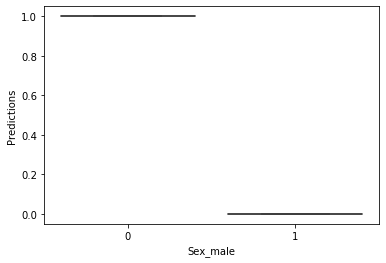

In [40]:
sns.boxplot(x='Sex_male',data=result1, y='Predictions')
plt.show()

In [41]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



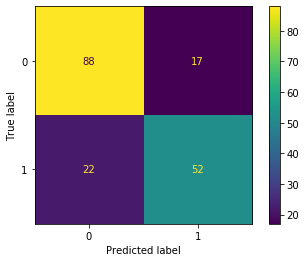

In [42]:
plot_confusion_matrix(model1,X_test,y_test)

### Question 4: Predicting survival by passenger class

In [43]:
df4 = pd.read_csv("titanictransform.csv")

In [44]:
df4.head()

,Survived,Pclass,Age,Fare,SibSp,Parch,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,2,1,0,1
1,1,1,38.0,71.2833,1,0,2,0,0,0
2,1,3,26.0,7.9250,0,0,1,0,0,1
3,1,1,35.0,53.1000,1,0,2,0,0,1
4,0,3,35.0,8.0500,0,0,1,1,0,1


In [45]:
df4 = df4[['Pclass','Survived']]

In [46]:
df4.head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [47]:
df4.dtypes

Pclass      int64
Survived    int64
dtype: object

In [48]:
X = df4.iloc[:,0:1]
y = df4.iloc[:,1]

In [49]:
X.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [50]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model2 = XGBClassifier()

In [53]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
ypred2 = model2.predict(X_test)

In [55]:
ypred2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [56]:
X_test

,Pclass
709,3
439,2
840,3
720,2
39,3
290,1
300,3
333,3
208,3
136,1


In [57]:
ypred2_df = pd.DataFrame(data=ypred2, columns=['Predictions'])

In [58]:
ypred2_df

,Predictions
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,1


In [59]:
y_test_df = pd.DataFrame(data=y_test)
y_test_df

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


In [60]:
result2 = pd.concat([X_test,y_test_df],axis=1)

In [61]:
result2.reset_index(inplace=True)
result2

,index,Pclass,Survived
0,709,3,1
1,439,2,0
2,840,3,0
3,720,2,1
4,39,3,1
5,290,1,1
6,300,3,1
7,333,3,0
8,208,3,1
9,136,1,1


In [62]:
r2 = pd.concat([result2,ypred2_df],axis=1)
r2

,index,Pclass,Survived,Predictions
0,709,3,1,0
1,439,2,0,0
2,840,3,0,0
3,720,2,1,0
4,39,3,1,0
5,290,1,1,1
6,300,3,1,0
7,333,3,0,0
8,208,3,1,0
9,136,1,1,1


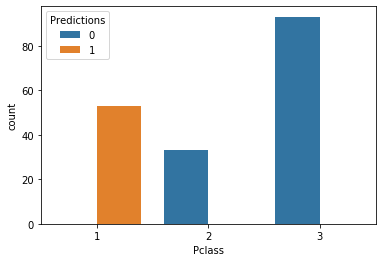

In [63]:
sns.countplot(x='Pclass', data=r2, hue='Predictions')
plt.show()

In [64]:
print(classification_report(y_test,ypred2))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179



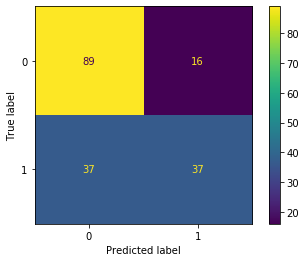

In [65]:
plot_confusion_matrix(model2,X_test,y_test)